## Lab 8: Numerical Solutions to ODEs

We talked about briefly in class that we are not always able to find all of the solutions to a differential equation. In some cases, this is just because the integrals we would need to compute are beyond our ability, but would be doable with more advanced techniques. In other cases the integrals are simply not solveable. There is also a third situation that can occur, in which the integrals are solveable with the tools we have, but the resulting equations are <i>transcendental</i>, and it is impossible to isolate for the state variable. In all of these cases, we still want to be able to come up with solutions, or at least good approximations of solutions. To find these approximate solutions, we turn to numerical methods. 

Consider an initial value problem of the form 
$$ \frac{dy}{dt} = F(t,y), \qquad \qquad y(t_0) = y_0.$$
There are many numerical methods to find approximate solutions to differential equations, but the simplest method is called Euler's method (pronounced like oiler's method).  This method is constructed using the fact that the derivative can help us to define a line tangent to the solution at a point $(t_0,y_0)$, which has the equation 
$$ T(t) =\frac{dy}{dt}\Big\vert_{t_0,y_0}(t-t_0)+y_0 =  F(t_0,y_0)(t-t_0) + y_0.$$
This tangent line stays close to the solution for values of $t$ close to $t_0$. We can then use the tangent line to "step ahead" of $t_0$ and find an approximate value of $y$ for that value of $t$. I.e. if we increase $t$ by $h$, we can define 
\begin{align*}
    t_1 &= t_0+h,\\
    y_1 &= T(t_1) = F(t_0,y_0)h + y_0.
\end{align*}
We can then treat these as new initial conditions, compute the derivative, and find the $t$ and $y$ values for another step forward. This procedure can then be written iteratively as 
\begin{align}
t_{n+1} & =  t_n + h,\\
y_{n+1} & = F(t_n,y_n)h + y_n.
\end{align}

#### Example

Consider the simple initial value problem, 
$$ \frac{dy}{dt} = -y, \qquad y(0) = 1.$$
This is an autonomous ODE, which can easily solve. The solution is $y(t) = e^{-t}$. Knowing what the solution is will help us demonstrate how well Euler's method works to find approximate solutions. We will use the initial conditions as the starting point $(t_0,y_0) = (0,1)$. For this examples, the equation of the line tangent to the solution at $(0,1)$ is 
$$ T(t) = (-1)(t-0)+(1) = -t+1.$$

(-1.0, 2.0)

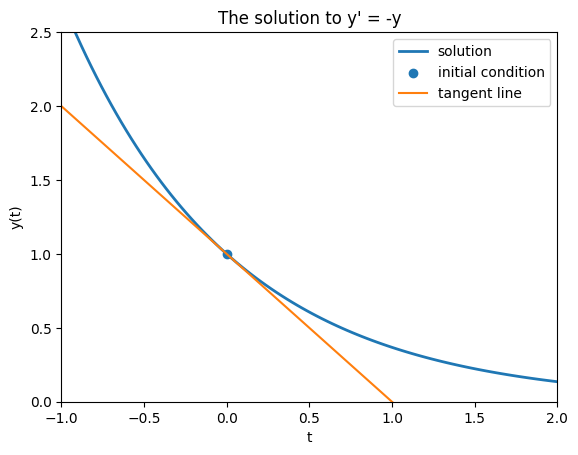

In [21]:
import numpy as np
from matplotlib import pyplot as plt

t = np.linspace(-1,2,100)
y = [np.exp(-j) for j in t]

plt.plot(t,y, linewidth = 2, label = "solution")
plt.ylabel("y(t)")
plt.xlabel("t")
plt.title("The solution to y' = -y")
plt.scatter([0],[1],label = "initial condition") ## The initial condition
plt.plot(t,-t+1, label = "tangent line") #line tangent at the initial condition
plt.legend()
plt.ylim(0,2.5)
plt.xlim(-1,2)

We want to decide on a "step size" $h$, for which we will increase $t$. This value should be small enough that the tangent line doesn't get very far away from the true solution, but large enough that our computer won't have to compute millions of points to get from 0 to 1. To illustrate, we'll use two choices, $h = 0.25$, which is probably too large, and $h=10^{-5}$, which is probably about right. 

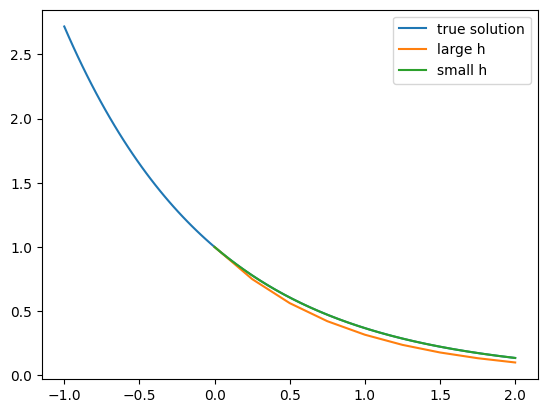

: 

In [22]:
## Compute an approximate solution using Euler's Method. 

def F(t,y): 
    return -y
# Even though F is only a function of y, we can still include the t-dependence in the function.
# Whatever we input for t will be ignored since it isn't used.

# Large value of h 
h = 0.25
n = int(2/h)  # Number of steps required to get from 0 to 1. The "int" is to convert the data type to an integer
t1 = [0.0]
y1 = [1.0]
for j in range(n):
    dt = t1[j]+h # Increase the t value by h
    dy = F(t1[j],y1[j])*h + y1[j] # Change the y value by dy/dt*h = F(t,y)*h
    t1.append(dt) # Save the new t-value
    y1.append(dy) # Save the new y-value

# Small value of h
h = 1e-5
n = int(2/h) 
t2 = [0.0]
y2 = [1.0]
for j in range(n):
    dt = t2[j]+h
    dy = F(t2[j],y2[j])*h+y2[j]
    t2.append(dt)
    y2.append(dy)

plt.plot(t,y, label = "true solution")
plt.plot(t1,y1,label = "large h")
plt.plot(t2,y2,label = "small h")
plt.legend()

This code was not written in the most elegant way. Some of the tasks will be centered around converting this poorly written code into something that is more reuseable, and can be adapted any first order ODE, any initial conditions, and any step size we want. 

### Tasks 

<b> Task 1</b><br>
The following code is meant to define a function that computes Euler's method for us. It has 4 arguments, <code>F</code> is the right hand side of the differential equation, <code>y0</code> is the initial value of $y$, <code>tspan</code> is a pair of values for the starting value of $t$ and the ending value of $t$, and <code>h</code> is the step size. Unfortunately, this function has a few errors and doesn't work. 

Fix this function.

In [18]:
def Euler(F,y0,tspan,h)
    t = np.arrange(tspan[0],tspan[1],h) # Make t-values. Arange(a,b,h) makes a vector of values from (a,b) spaced h apart
    y = np.zeros_like(t) # Make y values
     y[0] = y_0 # Set first y  value
    for j in range(1,len(t)): # Make all the y values
        y[j+1] = F(t[j-1],y[j-1]) * H + y[j-1]
    t,y #Return t and y

<b> Task 2</b><br>
Find (by hand) and plot the actual solution to the initial value problem for $t \in (0,10)$
\begin{equation}
    \frac{dy}{dt} + \frac{2t}{2+t^2}y = 1, \qquad y(0) = 1.
\end{equation}

<b> Task 3</b><br>
Verify that you fixed the <code>Euler</code> function from task 1 by using it to plot an approximate solution with $h = 10^{-4}$.  

<b> Task 4</b><br>
An improvement on Euler's method is called the trapezoid method. Instead of computing the value on the tangent line at one point, we compute it at two different points and averages them. The iterative scheme for the trapezoid method is described by 
\begin{align}
    t_{n+1} &= t_n + h,\\
    \tilde{y}_{n+1} &= F(t_n,y_n)h + y_n,\\
    y_{n+1} &= \Big(F(t_n,y_n)+F(t_{n+1},\tilde{y}_{n+1})\Big)\frac{h}{2}+y_n. 
\end{align}
The value $\tilde{y}_{n+1}$ is the value that would be found by Euler's method. Instead, it is used to calculate a better approximation, $y_{n+1}$

Write a function <code>Trapezoid</code> to compute the trapezoid method, similar to <code>Euler</code> from Task 1. 

<b> Task 5</b><br>
We can't find a solution to the ordinary differential equation
\begin{equation}
    \frac{dy}{dt} +\cos(y) = \cos(t).
\end{equation}
Plot a direction field for this differential equation, and use your <code> Trapezoid </code> function from task 4 to plot approximate solutions for the initial conditions $y(0) = -1.0$, $y(0) = 0.0$, $y(0)=1.0$, and $y(0) = 2.0$ for $t \in (0,10)$. 